# Проект по AB-тестированию

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Данные для первой части:**
1. Файл /datasets/hypothesis.csv.
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
 
 
**Данные для второй части:**

2. Файл /datasets/orders.csv. 
 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
 
 
3. Файл /datasets/visitors.csv.
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Для эффективного выполнения проекта неоходимо решить следующие задачи:
    
**Задача №1:** 

 - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
 
**Задача №2 Проанализируйте A/B-тест:**

 - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
 - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
 - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
 
 
**Задача №3 Примите решение по результатам теста и объясните его. Варианты решений:**

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**На первом этапе, выгрузим данные, посмотрим на них, при необходимости проведем предобработку**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

In [2]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [3]:
visitors= pd.read_csv('/datasets/visitors.csv')
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
# приведем столбцы к нужному виду
orders.columns = ['transaction_id','visitor_id', 'date', 'revenue', 'group']

In [7]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [8]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [9]:
hypothesis.columns = hypothesis.columns.str.lower()

In [10]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [11]:
print(orders.duplicated().sum())
print(visitors.duplicated().sum())
print(hypothesis.duplicated().sum())

0
0
0


In [12]:
print(orders.isna().sum())
print(visitors.isna().sum())
print(hypothesis.isna().sum())

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64
date        0
group       0
visitors    0
dtype: int64
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64


In [13]:
print(orders.describe())
print(visitors.describe())
print(hypothesis.describe())

       transaction_id    visitor_id       revenue
count    1.197000e+03  1.197000e+03  1.197000e+03
mean     2.155621e+09  2.165960e+09  8.348006e+03
std      1.229085e+09  1.236014e+09  3.919113e+04
min      1.062393e+06  5.114589e+06  5.000000e+01
25%      1.166776e+09  1.111826e+09  1.220000e+03
50%      2.145194e+09  2.217985e+09  2.978000e+03
75%      3.237740e+09  3.177606e+09  8.290000e+03
max      4.293856e+09  4.283872e+09  1.294500e+06
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000
           reach     impact  confidence    efforts
count   9.000000   9.000000    9.000000   9.000000
mean    4.777778   4.777778    5.555556   4.888889
std     3.153481   3.192874    3.045944   2.803767
min     1.000000   1.000000    1.000000   1.000000
25%     3.000000   3.000000    3.000000   3.000000
50%     3.000000   3.000000    7.000000   5.000000
75%     8.000000   7.000000    

Предобработка завершена, изменили тип данных, привели заголовки столбцов к правильному виду, дубликатов и пропусков в данных нет

**На первом шаге применим фреймворки для приоритезации гипотез**

In [14]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


In [15]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Мы видим, что в случае в ICE наиболее приоритетными оказались гипотезы 8, 0 и 7. В случае в RICE - 7, 2, 0 соовтественно. 2/3 из наиболее приоретизированных гипотез оказались в обеих моделях, но в разном порядке. Такое различие достигается из-за формул расчета, в модели RICE учитывается параметр "охват", а в модели ICE данный параметр не учитывается.

Далее необходимо оценить результаты А/В теста. Тут стоит уточнить, что в данном проекте нам не нужно проводить оценку результатов А/А теста, а также оценивать ошибки I и II рода, проводить размеры выборки и длительности теста. Единственное, что мы можем сделать, это статистически оценить различия в группах, но мы видим, что оно незначима, следовательно, данные можно оставить как есть

 - Н0: Разница в количестве посетителей в группах A и B статистически не значима
 - Н1: Разница в количестве посетителей в группах A и B статистически значима   

**Проанализируем результаты А/В теста**

In [17]:
results = stats.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print('P-value:{}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима')
else:
    print('Разница в количестве посетителей в группах A и B статистически не значима')

P-value:0.7301376549390499
Разница в количестве посетителей в группах A и B статистически не значима


1) Построим график кумулятивной выручки по группам

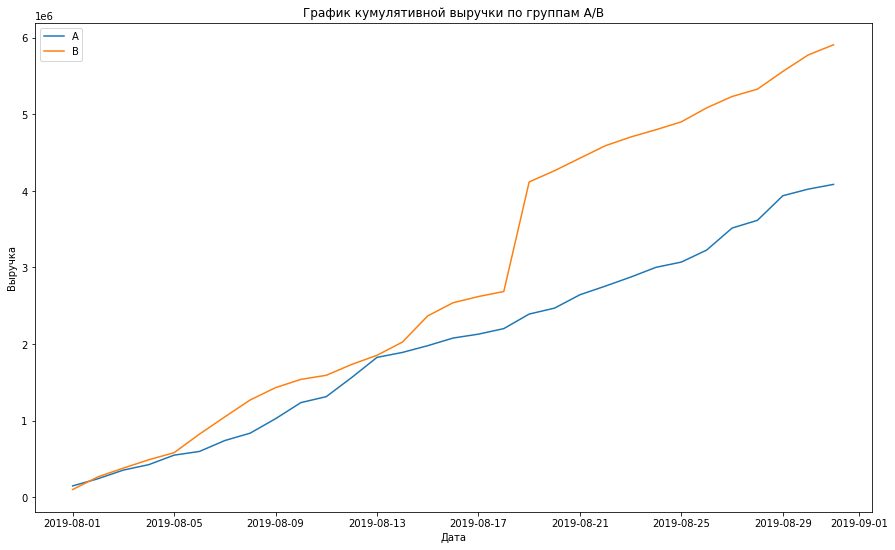

In [18]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,9))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам A/B')
plt.legend()
plt.show()

Вывод: группа В на протяжении всего времени демонстрирует бОльшую выручку, чем группа А, а также наблюдается резкий скачок в данных посде 17.08, вероятно, в данных присутствуют выбросы, они же аномалии. Скорее всего, они связаны с дорогостоящими заказами, которые появились у интернет-магазина в эти дни. Дальше будем с ними разбироваться.

2) Построим график кумулятивного среднего чека по группам

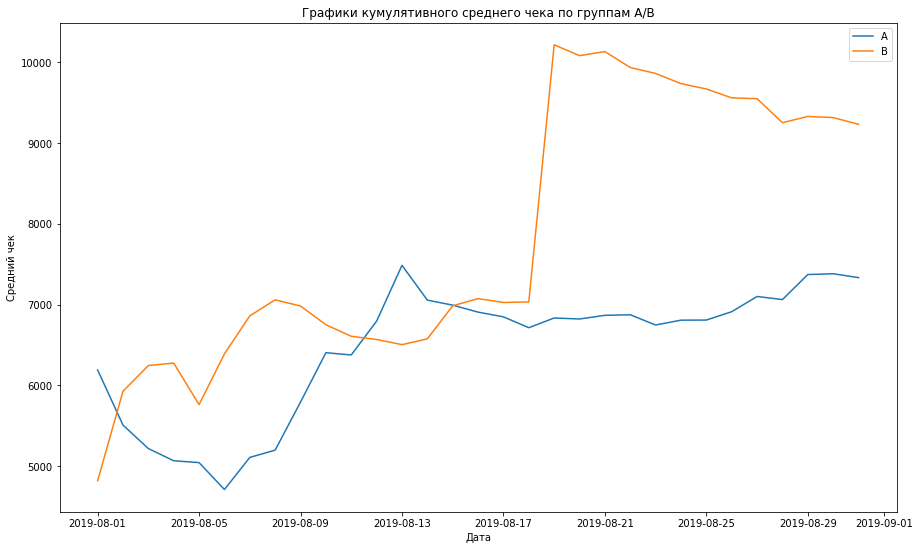

In [19]:
plt.figure(figsize=(15,9))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label='B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show() 

По графику видно, как после 17.08 в группе В существенно увеличился кумулятивный средний чек, что точно говрит о выбросах в данных.

3) Посмтроим график относительного изменения кумулятивного среднего чека группы B к группе A

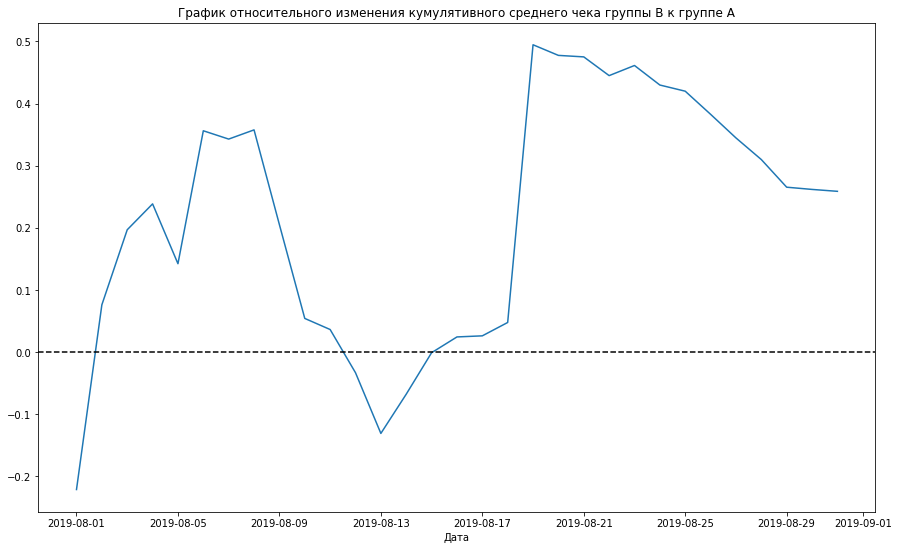

In [20]:
plt.figure(figsize=(15,9))
mergedCumulativeRevenue = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

По графику видно, как существенно отличаются покупки в разные дни теста, это и будут, скорее всего, наши аномалии.

4) Построим график кумулятивного среднего количества заказов на посетителя по группам.

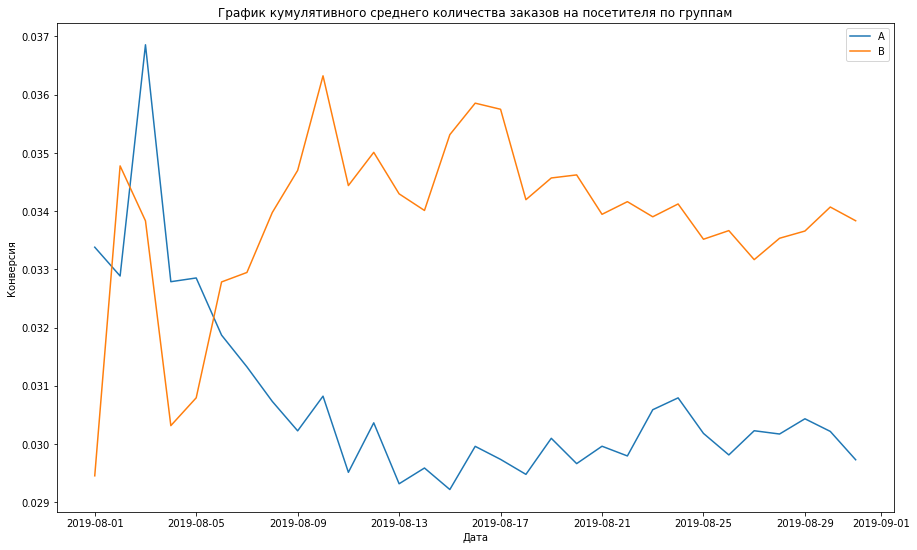

In [21]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15,9))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

На графике наблюдается пик значений у групп в самом начале теста, затем показатели у группы А начали резко снижать, наблюдается некая симметричность графиков различных групп, к тому же показатели группы В стабильно выше, что имеет положительный результат для нас. Сейчас еще рано делать какие-либо выводы относительно результатов теста.

5) Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

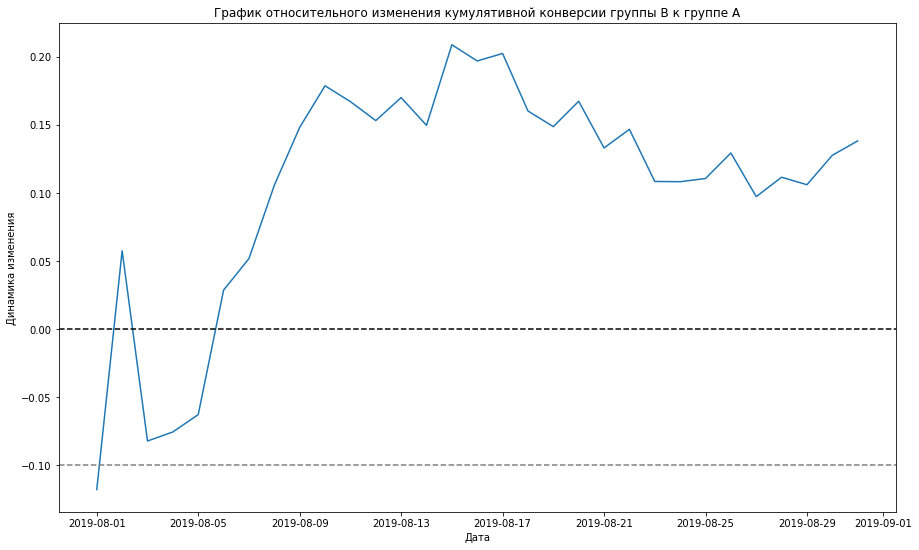

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,9))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Динамика изменения')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

Относительное изменение кумулятивной конверсии группы В показывает себя гораздо лучше, чем в группе А, пиковые значения находятся на уровне 20%. Кажется, что тест проходит в положительном для нас ключе.

Далее мы переходим к этапу анализа выбросов в данных, которые предположительно были нами обнаружены.

Для этого нам необходимо построить точечный график количества заказов по пользователям

In [23]:
ordersByUsers = orders.groupby('visitor_id', as_index = False).agg({'transaction_id':'nunique'}).sort_values(by='transaction_id', ascending = False)
ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers.head(5)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


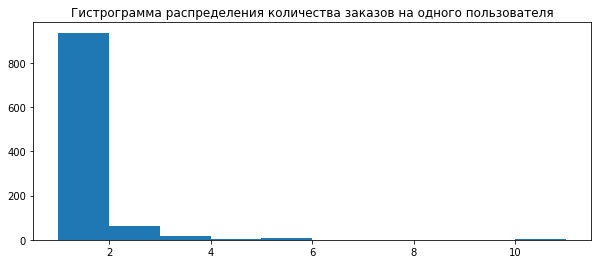

In [24]:
plt.figure(figsize=(10,4))
plt.hist(ordersByUsers['orders'], bins = 10)
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.show()

По гистограмме видно, что в основном пользователи совершают до 2-ух заказов, при этом есть аномалии в виде 10 заказов. Построим диаграмму рассеяния.

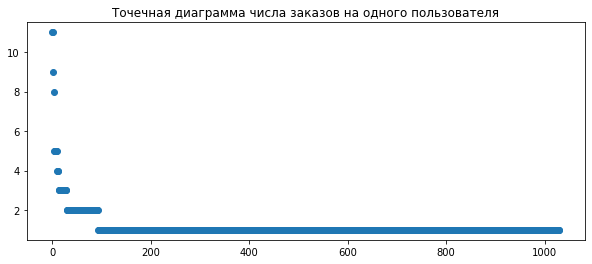

In [25]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.show()

По графику видно, что пользователи не совершают ,в основном, не совершают более 2-ух заказов, определенно есть выбросы, далее их и проанализируем

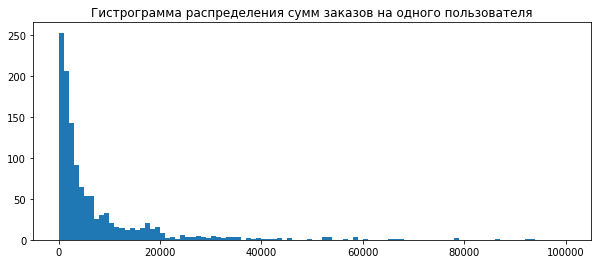

In [26]:
plt.figure(figsize=(10,4))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.show()

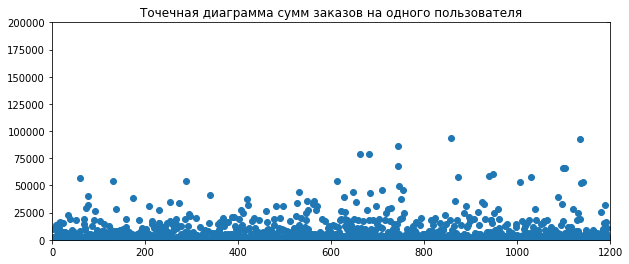

In [27]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.axis([0, 1200, 0, 200000])
plt.show()

Один пользователь чаще всего тратит до 20.000 на заказ, при этом наблюдаются выбросы, скорее всего были крупные закупки какой-либо организацией.

Необходимо определить границу аномалий количества заказов на 1 пользователя и стоиомости заказа с помощью перцентилей.

In [28]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print(percentiles)

[2. 4.]


Не более 5% процентов пользователей совершают более 2 заказов

In [29]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print(percentiles)

[28000.  58233.2]


Не более 5% клиентов совершают покупки более чем на 28000.

Таким образом, граница аномалий определяетмся как 2 заказа, сумма - 28000.

Далее посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Изначально необходимо обозначить гипотезы
 - Н0: Различии в среднем количестве заказов на посетителя нет
 - Н1: Различия в среднем количестве заказов на посетителя есть
 
 Затем данные гипотезы будут проверены с помощью критерия Манна-Уитни

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

cummulative = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value:{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

P-value:0.017
0.138


p-value < 0.05, следовательно мы отвергаем 0 гипотезу, о том, что стастистических различий между группами на "сырых данных" нет, различия есть

Теперь очистим данные и посмотрим измениятся ли результаты

Снова необходимо обозначить гипотезы
 - Н0: Различии в среднем количестве заказов на посетителя нет
 - Н1: Различия в среднем количестве заказов на посетителя есть
 
 Затем данные гипотезы будут проверены с помощью критерия Манна-Уитни

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)


usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value:0.013
0.173


P-value < 0,05, следовательно, мы отвергаем нулевую гипотезу и приходим к выводу о том, что при очищенных данных существует статистическая разница в группах А и В по показателю среднего количества заказов на посетителя

Далее проведем схожий тест, но для оценки различий в среднем чеке заказа между группами

Изначально проанализируем сырые данные
 - Н0: средний чек одного заказа между группами не отличается
 - Н1: средний чек одного заказа между группами отличается

In [32]:
print('P-value:{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value:0.729
0.259


p-value > 0.05, следовательно, различий в среднем чеке одного заказа для "сырых данных" нет

Теперь проанализируем очищенные данные
 - Н0: средний чек одного заказа между группами не отличается
 - Н1: средний чек одного заказа между группами отличается

In [33]:
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])
print('P-value:{0:.3f}'.format(results.pvalue))
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ))

P-value:0.738
-0.020


P- value больше 0,05, следовательно при очищенный данных также нет различий в среднем чеке одного заказа.

Мы закончили технически анализировать результаты А/В теста, сейчас перед нами стоит последняя задача - принять решение о дальнейших действиях по его результату

# Финальное решение

Перед нами 3 варианта:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**По результатам теста, можно сделать вывод, о том, что он прошел успешно, его можно остановить и зафиксировать победу группы В.**

Группа В значительно превосходит группу А по конверсии, кумулятивного среднего чека.

В данных присутствовали аномалии, которые влияли на кумулятивные значения, после очистки все стабилизировалось

При этом, стоит отметить, что средний чек между двумя группами не отличается.

Однако стоит отметить, что наблюдалась проблема подглядывания, однако мы ее статистически отбросили.

Также мы приоретизировали гипотезы с помощью методики ICE и RICE. Используя эти методики, у нас получилась различная их приоретизация, так как в методе ICE не учитывается параметр "охват". Если мы обратимся к методике RICE, то наиболее приоретизированной является гипотеза о добавлении формы подписки на все основные страницы сайта
